# Interactive Plotting and Monte Carlo Simulations of CPPI

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import stark

%load_ext autoreload
%autoreload 2

## GBM Interactive Plots

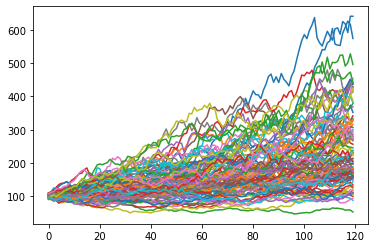

In [2]:
stark.geometric_brownian_motion(10, 100, mu=0.1).plot(legend=False);

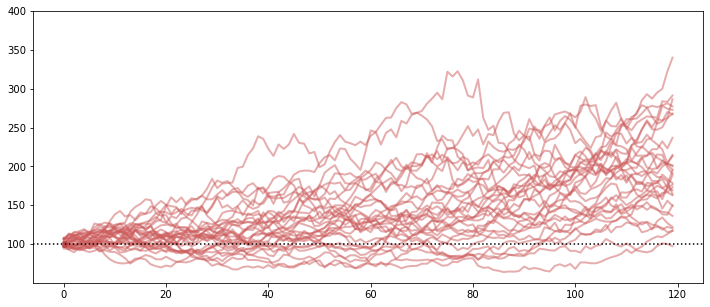

In [3]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a 
    Geometric Brownian Motion Model
    """
    s_0 = 100
    prices = stark.geometric_brownian_motion(
        n_scenarios=n_scenarios, 
        mu = mu, 
        sigma = sigma, 
        s_0 = s_0,
    )
    ax = prices.plot(
        legend=False, 
        color="indianred", 
        alpha=0.5, 
        linewidth=2, 
        figsize=(12, 5)
    )
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    # draw a dot at the origin
    ax.plot(0, s_0, marker="o", color="darkred", alpha=0.2)
    
show_gbm(30, 0.07, 0.15)

In [4]:
gbm_controls = widgets.interactive(
    show_gbm,
    n_scenarios = (1, 20, 1),
    mu = (-0.2, 0.2, 0.01),
    sigma = (0, 0.3, 0.01)
)

In [5]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [16]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., risk_free_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = stark.geometric_brownian_motion(
        n_scenarios=n_scenarios, 
        mu=mu, 
        sigma=sigma, 
        prices=False, 
        steps_per_year=12,
    )
    risky_returns = pd.DataFrame(sim_rets)
    # run the back test
    backtest = stark.run_cppi(
        risky_returns = pd.DataFrame(risky_returns), 
        risk_free_rate = risk_free_rate,
        m = m, 
        start = start,
        floor = floor
    )
    wealth = backtest["wealth"]
    y_max = wealth.values.max() * y_max / 100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start * floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    
    
cppi_controls = widgets.interactive(
    show_cppi,
    n_scenarios = widgets.IntSlider(min=1, max=1000, step=5, values=50),
    mu = (0.0, 0.2, 0.01),
    sigma = (0, 0.30, 0.05), 
    floor = (0, 2, 0.1), 
    m = (1, 5, 0.5), 
    risk_free_rate = (0.0, 0.05, 0.01),
    y_max = widgets.IntSlider(
        min=0, 
        max=100, 
        step=1, 
        value=100, 
        description="Zoom Y Axis"
    )
)
display(cppi_controls)

interactive(children=(IntSlider(value=1, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(valu…

In [18]:
import matplotlib.pyplot as plt

In [22]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., risk_free_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = stark.geometric_brownian_motion(
        n_scenarios=n_scenarios, 
        mu=mu, 
        sigma=sigma, 
        prices=False, 
        steps_per_year=12,
    )
    risky_returns = pd.DataFrame(sim_rets)
    # run the back test
    backtest = stark.run_cppi(
        risky_returns = pd.DataFrame(risky_returns), 
        risk_free_rate = risk_free_rate,
        m = m, 
        start = start,
        floor = floor
    )
    wealth = backtest["wealth"]
    # calculate terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(
        nrows=1, 
        ncols=2, 
        sharey=True, 
        gridspec_kw ={"width_ratios":[3, 2]},
        figsize=(24, 9)
    )
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(
        ax=hist_ax, 
        bins=50, 
        ec="w", 
        fc="indianred", 
        orientation="horizontal"
    )
    
    hist_ax.axhline(y=start, ls=":", color="black")
    
    
cppi_controls = widgets.interactive(
    show_cppi,
    n_scenarios = widgets.IntSlider(min=1, max=1000, step=5, values=50),
    mu = (0.0, 0.2, 0.01),
    sigma = (0, 0.30, 0.05), 
    floor = (0, 2, 0.1), 
    m = (1, 5, 0.5), 
    risk_free_rate = (0.0, 0.05, 0.01),
    y_max = widgets.IntSlider(
        min=0, 
        max=100, 
        step=1, 
        value=100, 
        description="Zoom Y Axis"
    )
)
display(cppi_controls)

interactive(children=(IntSlider(value=1, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(valu…

In [27]:
import numpy as np
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., risk_free_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = stark.geometric_brownian_motion(
        n_scenarios=n_scenarios, 
        mu=mu, 
        sigma=sigma, 
        prices=False, 
        steps_per_year=12,
    )
    risky_returns = pd.DataFrame(sim_rets)
    # run the back test
    backtest = stark.run_cppi(
        risky_returns = pd.DataFrame(risky_returns), 
        risk_free_rate = risk_free_rate,
        m = m, 
        start = start,
        floor = floor
    )
    wealth = backtest["wealth"]
    # calculate terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures / n_scenarios
    
    e_shortfall = np.dot(
        terminal_wealth-start*floor, 
        failure_mask) / n_failures if n_failures > 0 else 0.0
    
    
    
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(
        nrows=1, 
        ncols=2, 
        sharey=True, 
        gridspec_kw ={"width_ratios":[3, 2]},
        figsize=(24, 9)
    )
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(
        ax=hist_ax, 
        bins=50, 
        ec="w", 
        fc="indianred", 
        orientation="horizontal"
    )
    
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    
    hist_ax.annotate(
        f"Mean: ${int(tw_mean)}", 
        xy=(0.7, 0.9),
        xycoords="axes fraction", 
        fontsize=24
    )
    hist_ax.annotate(
        f"Median: ${int(tw_median)}", 
        xy=(0.7, 0.85),
        xycoords="axes fraction", 
        fontsize=24
    )
    
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(
            f"Violations: {n_failures} = ({p_fail*100:2.2f}%)\nE(Shortfall)=${e_shortfall:.2f}", 
            xy=(0.7, 0.7),
            xycoords="axes fraction", 
            fontsize=24
        )
    
    
cppi_controls = widgets.interactive(
    show_cppi,
    n_scenarios = widgets.IntSlider(min=1, max=1000, step=5, values=50),
    mu = (0.0, 0.2, 0.01),
    sigma = (0, 0.50, 0.05), 
    floor = (0, 2, 0.1), 
    m = (1, 5, 0.5), 
    risk_free_rate = (0.0, 0.05, 0.01),
    y_max = widgets.IntSlider(
        min=0, 
        max=100, 
        step=1, 
        value=100, 
        description="Zoom Y Axis"
    )
)
display(cppi_controls)

interactive(children=(IntSlider(value=1, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(valu…